<a href="https://colab.research.google.com/github/cemileturkel/MNIST_Digits_Classification/blob/main/MNIST_Digits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns
from keras.datasets import mnist

np.random.seed(0)

# Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Visualize Examples

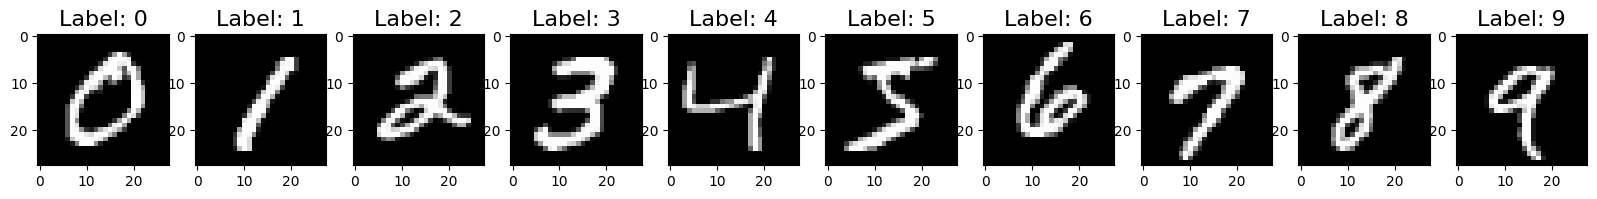

In [ ]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# Prepare Data

In [ ]:
# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Reshape Data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


# Create Model - Fully Connected Neural Network

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784,), activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Train

In [ ]:
batch_size = 512
epochs=10
history = model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6714 - loss: 1.0587
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9271 - loss: 0.2479
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9470 - loss: 0.1835
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9596 - loss: 0.1374
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9655 - loss: 0.1141
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9725 - loss: 0.0950
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9757 - loss: 0.0828
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.9790 - loss: 0.0702
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9810 - loss: 0.0635
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9832 - loss: 0.0568


# Evaluate

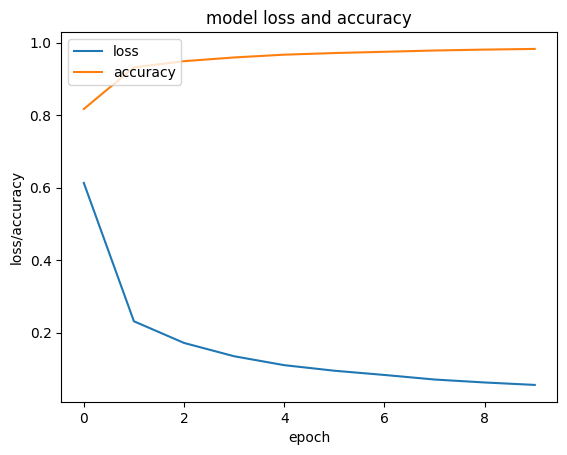

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.title('model loss and accuracy')
plt.ylabel('loss/accuracy')
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0858
Test Loss: 0.07361634820699692, Test Accuracy: 0.9764999747276306


In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[5.9270506e-06 1.1513635e-05 1.6249990e-04 ... 9.9958068e-01
  5.6809517e-06 4.3336629e-05]
 [5.0728040e-09 1.7787488e-04 9.9980998e-01 ... 1.7776675e-09
  3.2570176e-07 6.0804274e-12]
 [6.6018492e-07 9.9892992e-01 5.8033424e-05 ... 5.2057725e-04
  1.7674542e-04 7.4731415e-06]
 ...
 [1.9404848e-11 2.6579333e-08 5.5378258e-11 ... 6.6283911e-07
  1.0038285e-07 1.9570161e-05]
 [1.3133376e-08 3.3704687e-08 1.6464330e-09 ... 3.6427267e-08
  7.5716642e-05 1.0982162e-08]
 [1.8241446e-08 6.0253313e-10 6.6295369e-09 ... 2.8086047e-10
  3.1465122e-11 2.7607701e-11]]
[7 2 1 ... 4 5 6]


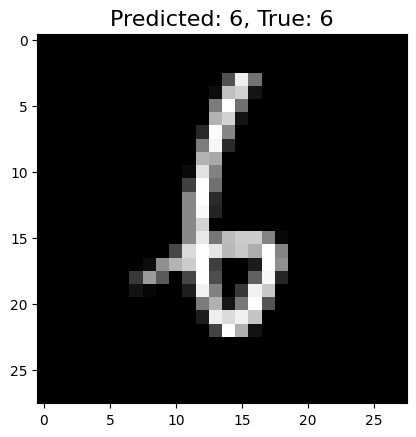

In [ ]:
# Single Example
random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize=16)
plt.imshow(x_sample.reshape(28, 28), cmap='gray')

# Confusion Matrix

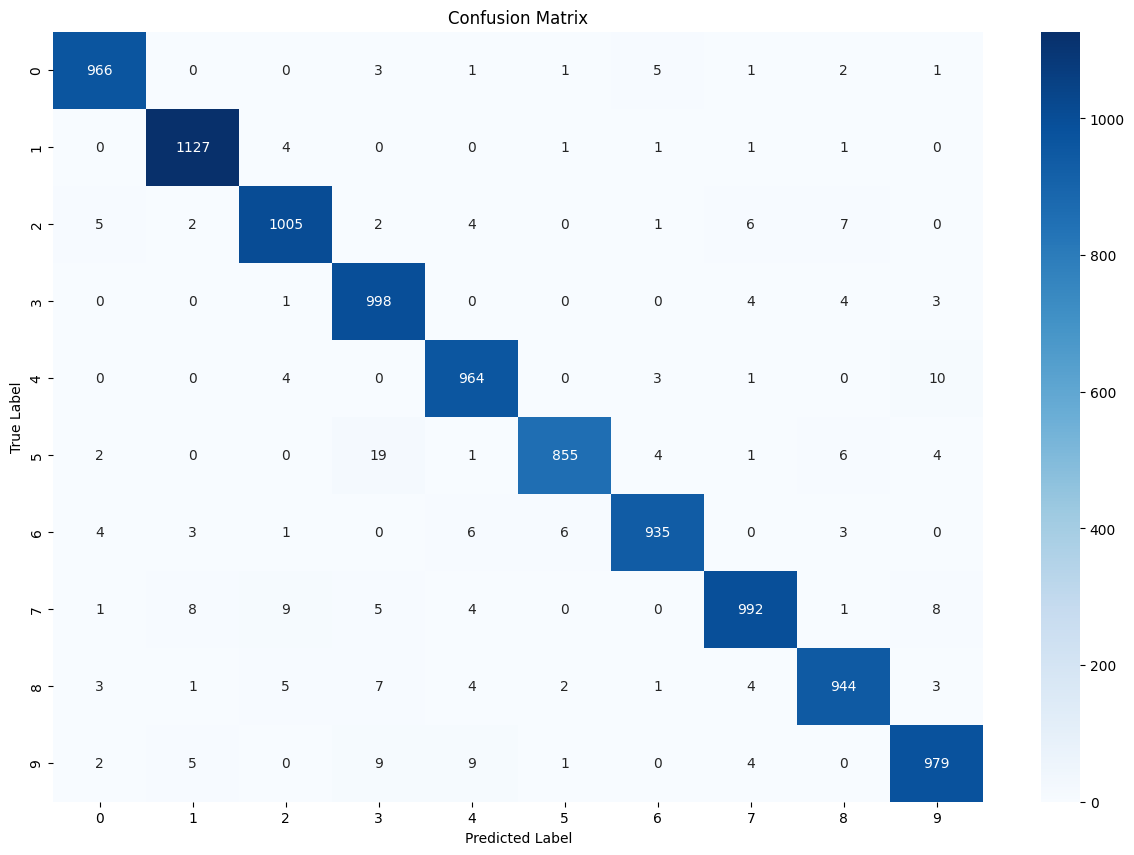

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt='d', ax=ax, cmap="Blues")
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix');

# Investigate Some Errors

In [ ]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [ ]:
y_pred_errors_probability = np.max(y_pred_errors, axis=1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis=1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

# Get list of indices of sorted differences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # 5 last ones

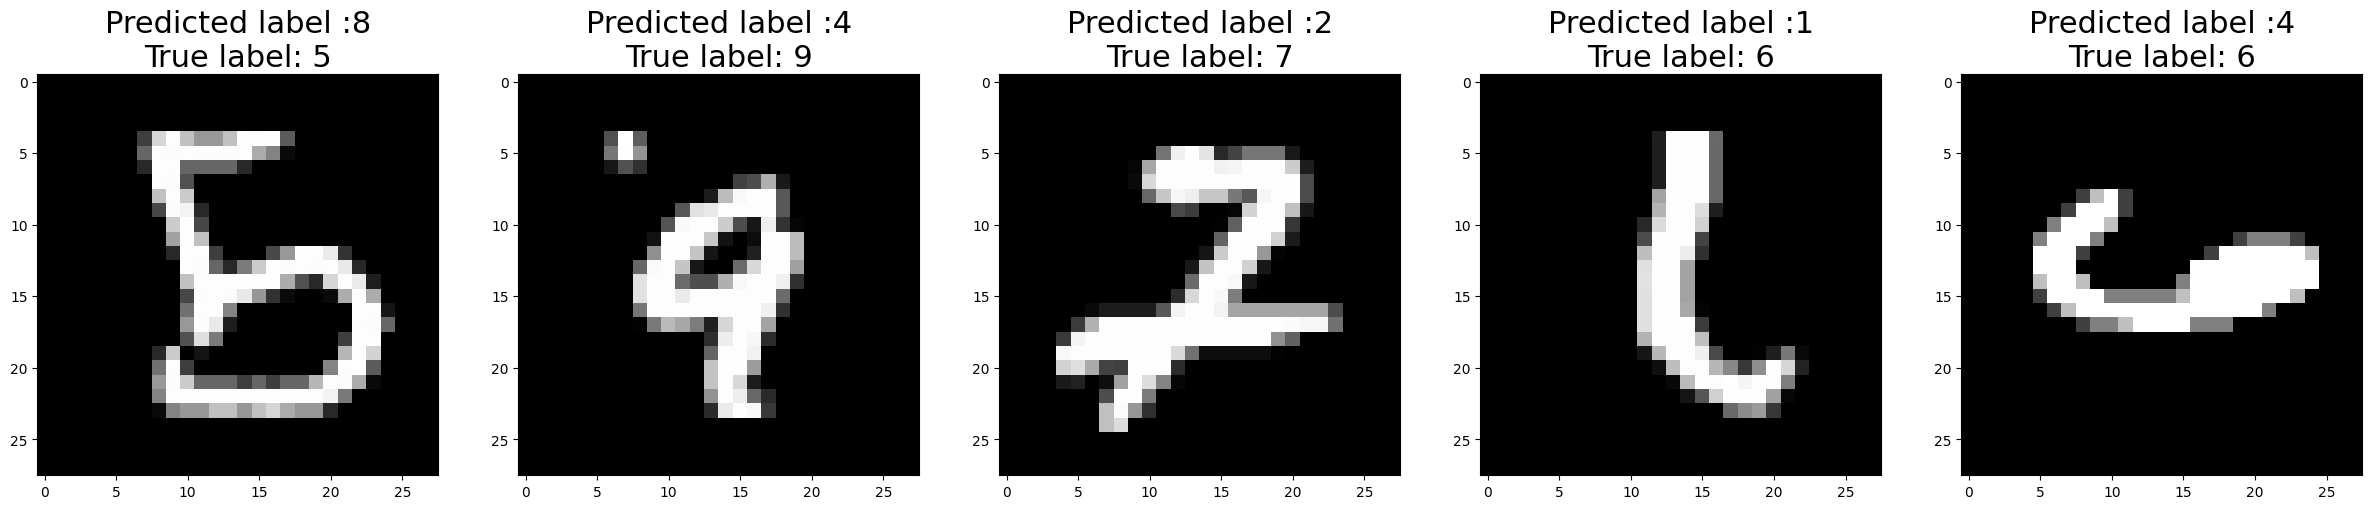

In [ ]:
# Show Top Errors
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize=(30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Predicted label :{}\nTrue label: {}".format(y_p, y_t), fontsize=22)

In [ ]:
model.save('mnist_model.h5')

In [ ]:
# Load the model
loaded_model = tf.keras.models.load_model('mnist_model.h5')

# Make predictions using the model
predictions = loaded_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
